# EDA (Exploratory Data Analysis) of the dataset

In this notebook, explore the Abalone dataset, by showing relevant visualizations that help understand the problem you are modelling.

Please make sure to write down your conclusions in the final notebook and to remove these intructions.

# Imports

In [18]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import kagglehub
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('display.max_columns', 500)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Data

In [19]:
# Download the dataset
path = kagglehub.dataset_download("rodolfomendes/abalone-dataset")
csv_path = os.path.join(path, "abalone.csv") 

df = pd.read_csv(csv_path)
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# EDA

In [20]:
# Checking for missing values
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [21]:
# Statistical Summary of the diffrent features
df.describe() 

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


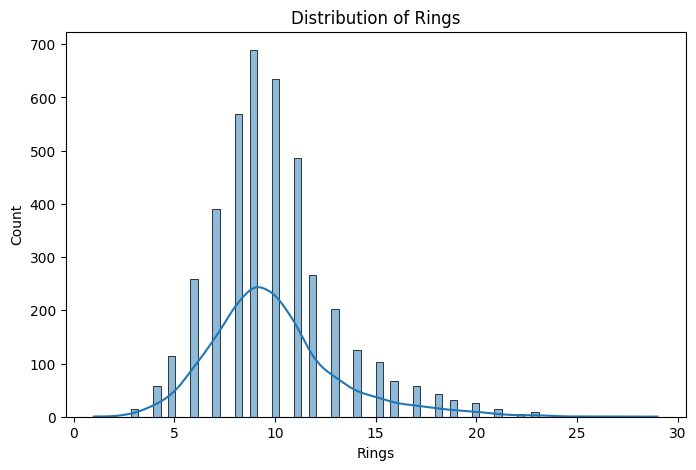

In [22]:
# Distribution of the target variable
plt.figure(figsize=(8, 5))
sns.histplot(df['Rings'], kde=True)
plt.title('Distribution of Rings')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_16336\2914140328.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)


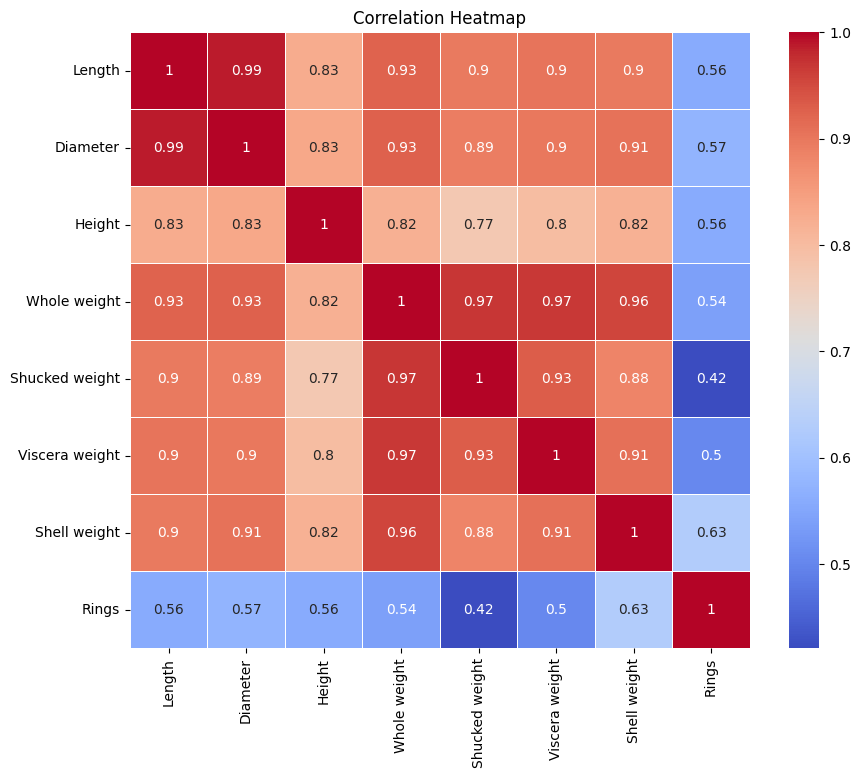

In [23]:
# Correlation matrix between numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


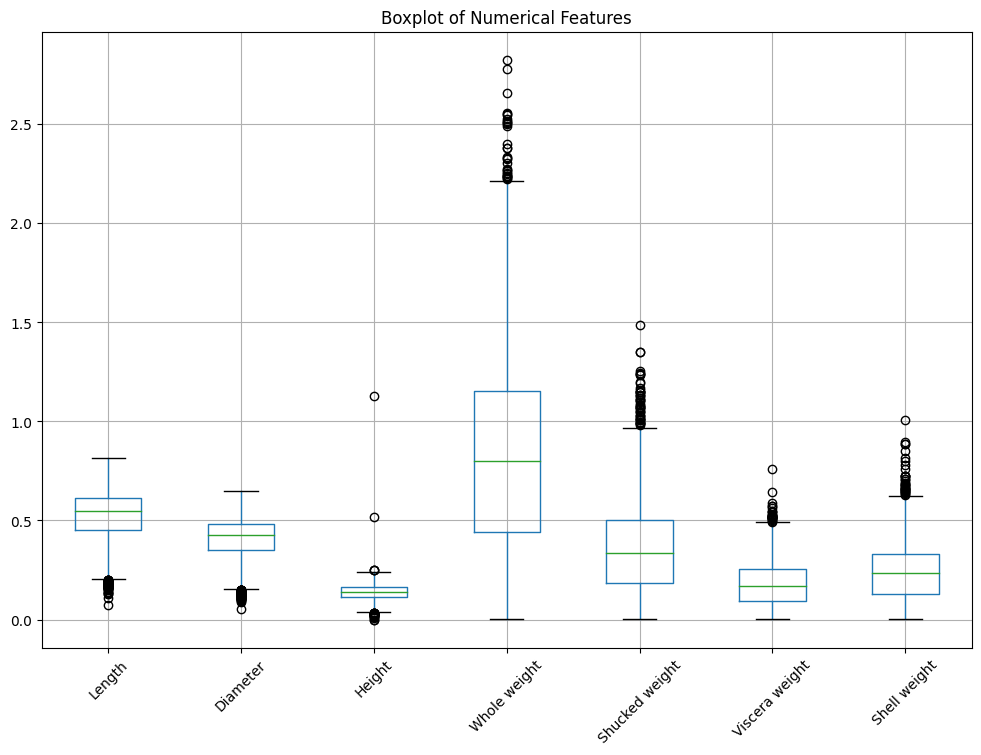

In [24]:
# Boxplots to check for outliers
plt.figure(figsize=(12, 8))
df.boxplot(column=['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight'])
plt.title('Boxplot of Numerical Features')
plt.xticks(rotation=45)
plt.show()

We have several outliers in the data that we need to take care of

In [25]:
def impute_outliers_IQR(df):
    """Function to imput outliers with IQR"""
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    upper = df[~(df>(q3+1.5*IQR))].max()
    lower = df[~(df<(q1-1.5*IQR))].min()
    
    df = np.where(df > upper,

        df.mean(),

        np.where(

            df < lower,

            df.mean(),

            df

            )
        )

    return df

In [26]:
# Impute the columns with outliers
columns_to_impute = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']
df_imputed = df.copy()

In [27]:
df_imputed[columns_to_impute] = df_imputed[columns_to_impute].apply(impute_outliers_IQR)


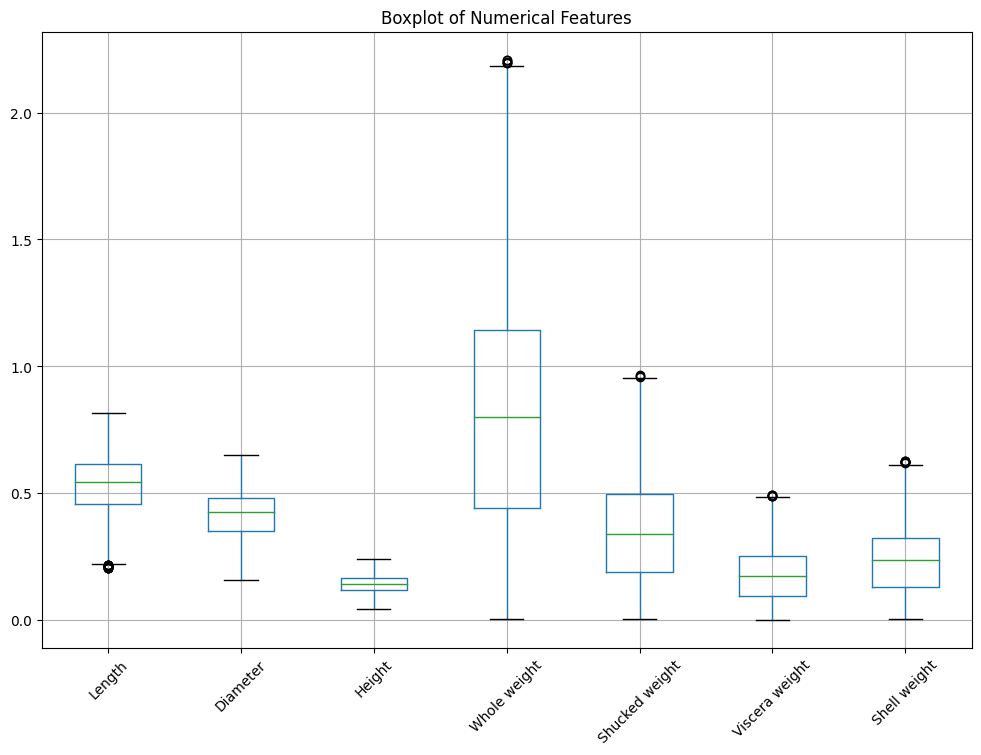

In [28]:
# Boxplots to check for outliers
plt.figure(figsize=(12, 8))
df_imputed.boxplot(column=['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight'])
plt.title('Boxplot of Numerical Features')
plt.xticks(rotation=45)
plt.show()

No outliers

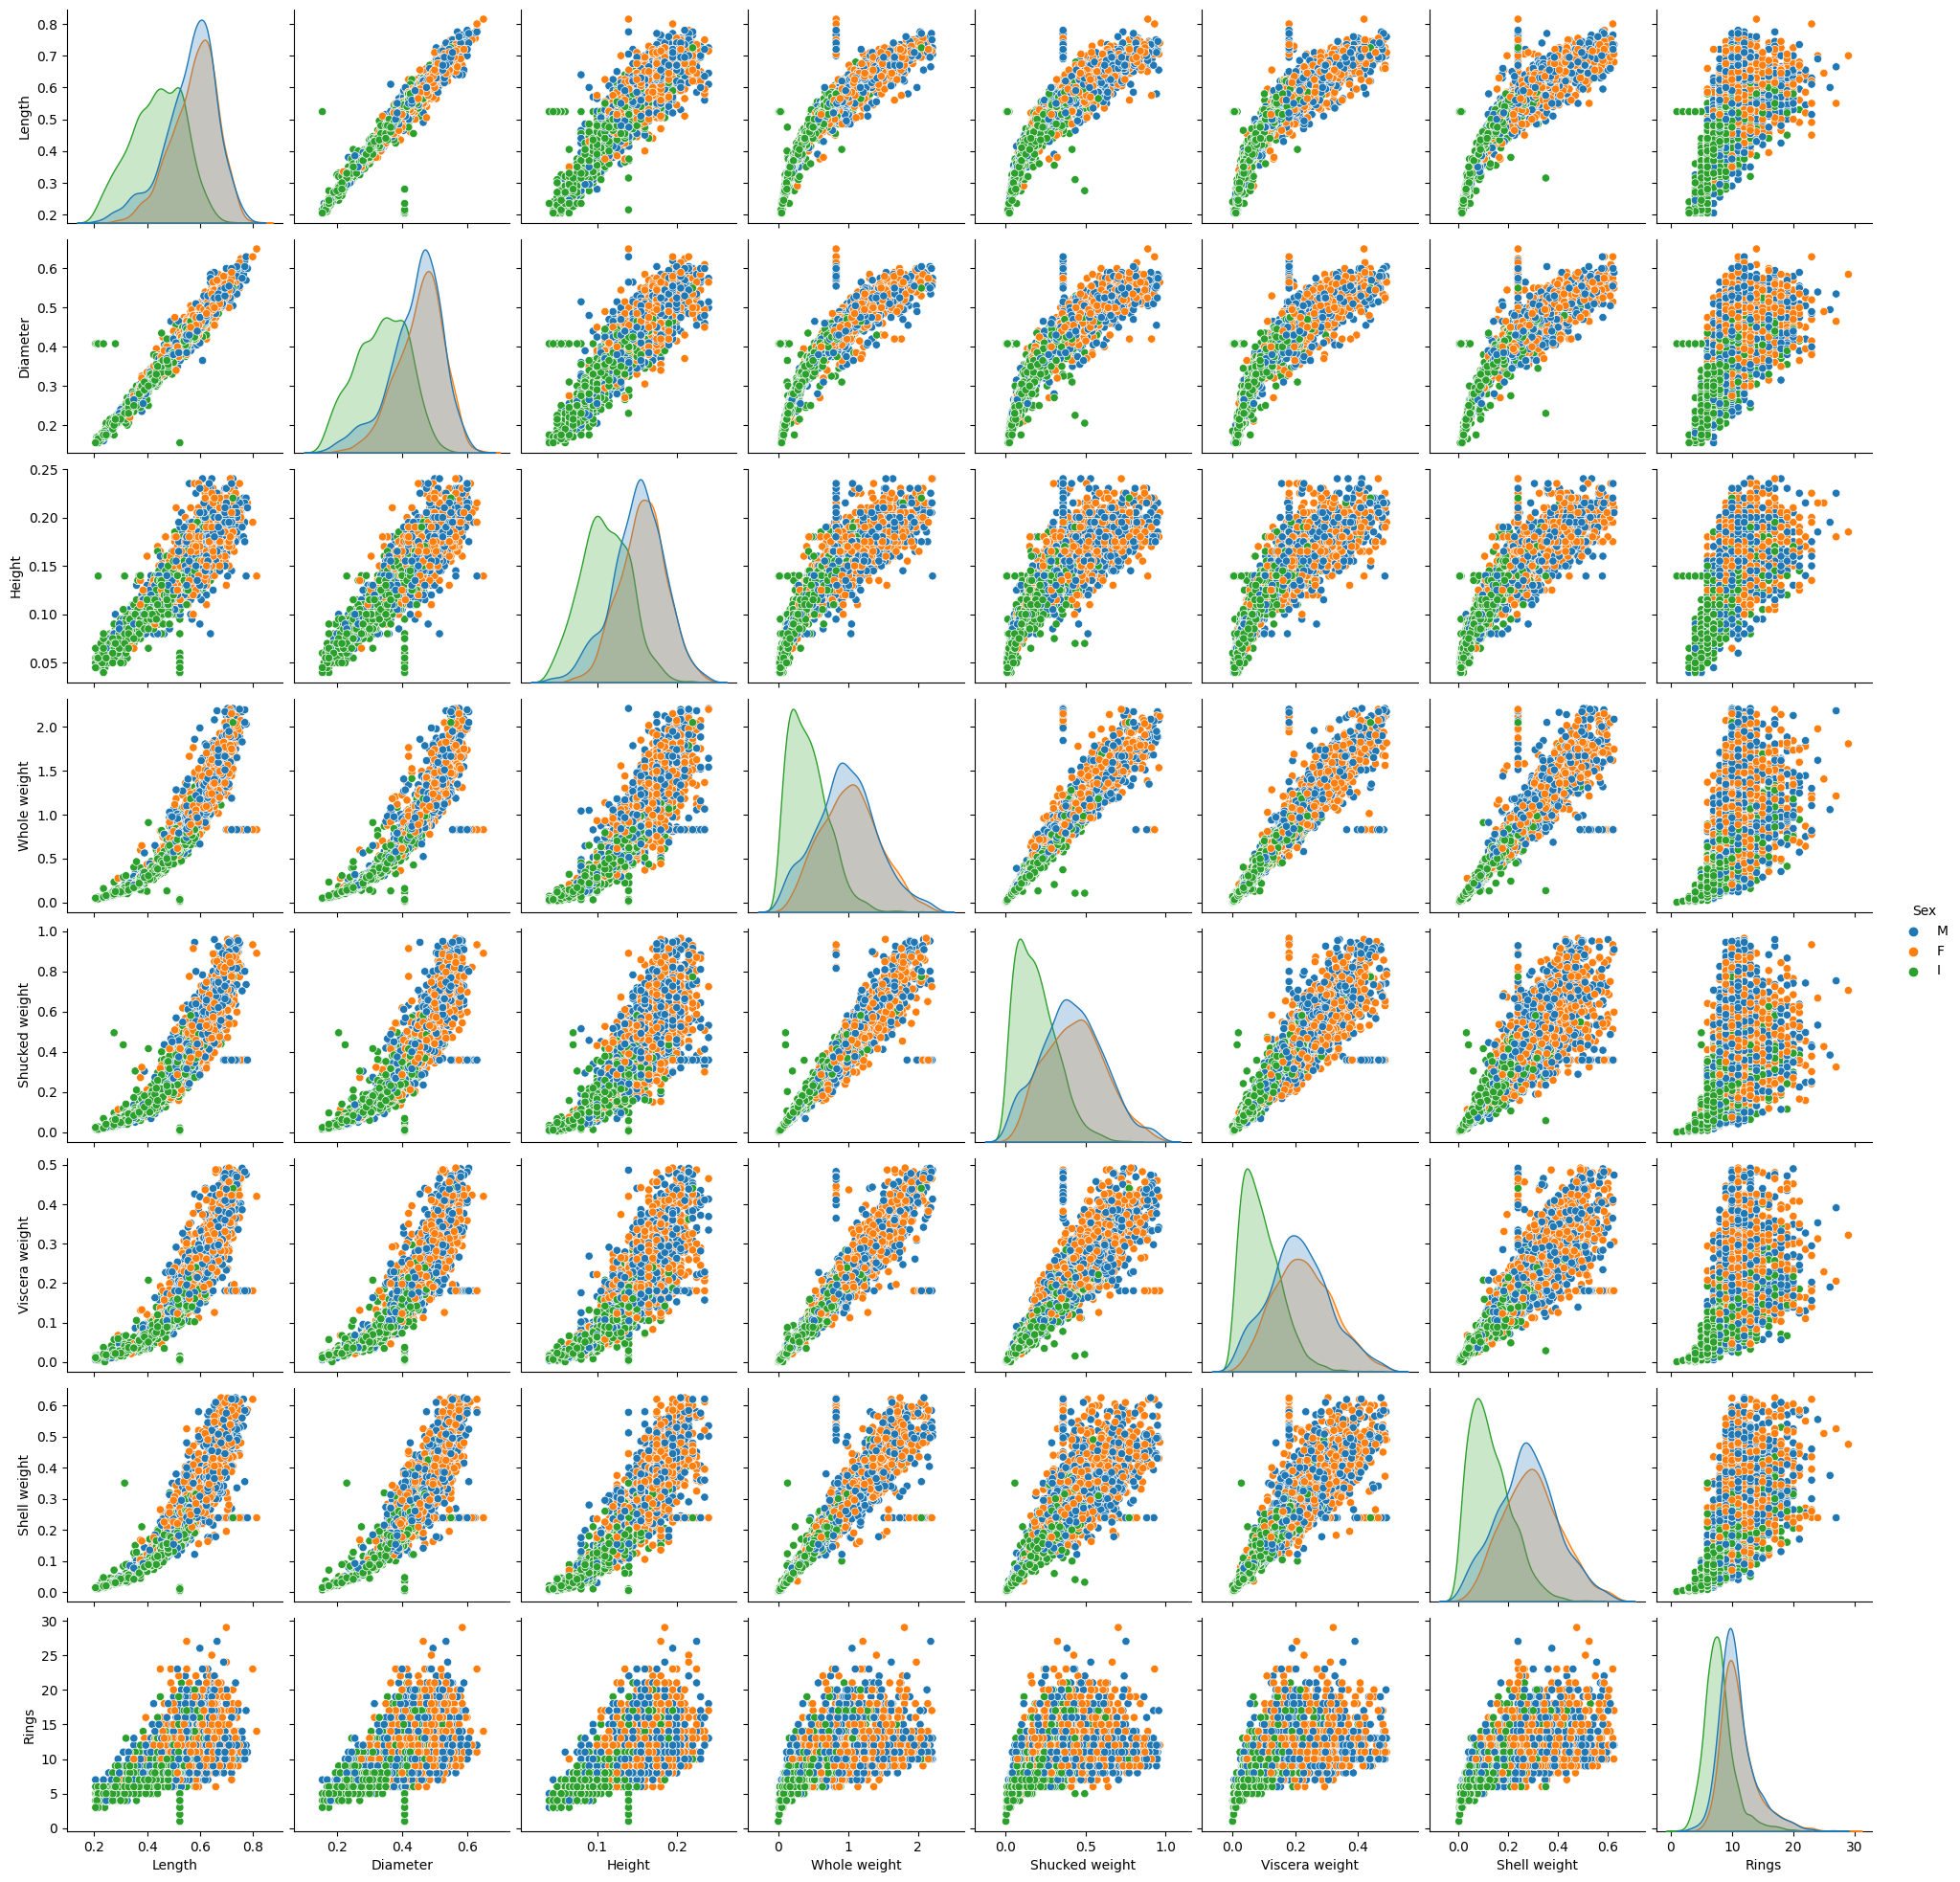

In [29]:
# Generate a pairplot to visualize relationships between numerical features and target variable
sns.pairplot(df_imputed, diag_kind='kde', hue='Sex')
plt.show()